In [31]:
import time
import requests
import json
from selenium.webdriver.support.ui import Select
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from requests.exceptions import ConnectionError

import pymongo
from pymongo import MongoClient
client = MongoClient("52.25.140.201",27017)
db = client['ProjectCorruption']
print db
collection = db['Links_to_articles']
print collection

starting_point = 0

Database(MongoClient('52.25.140.201', 27017), u'ProjectCorruption')
Collection(Database(MongoClient('52.25.140.201', 27017), u'ProjectCorruption'), u'Links_to_articles')


In [32]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import time

url = "https://www.google.com/advanced_search?hl=en&fg=1"

agent = "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/44.0.2403.130 Safari/537.36"

chrome = webdriver.Chrome()

chrome.get(url)


In [33]:
search_form = chrome.find_element_by_id("_cKg")
print search_form

In [34]:
#list_of_keywords = ['corrupcion','corrupto','corrupta','cohecho','soborno','coima','"enriquecimiento ilicito"',\
#                   '"conflicto de interes"','nepotismo','fraude','"compra de votos"','clientelismo']

search_form.send_keys("corrupcion corrupto corrupta cohecho soborno coima nepotismo fraude clientelismo")

In [35]:
search_form = chrome.find_element_by_id("_SKg")
search_form.send_keys("www.ambito.com.ar")
search_form.send_keys(Keys.RETURN)
print search_form

In [21]:
page = chrome.page_source

In [22]:
soup = BeautifulSoup(page)

<!DOCTYPE html>
<html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="en" xmlns="http://www.w3.org/1999/xhtml"><head><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"/><link href="/images/branding/product/ico/googleg_lodp.ico" rel="shortcut icon"/><meta content="origin" id="mref" name="referrer"/><title>corrupcion OR corrupto OR corrupta OR cohecho OR soborno OR coima OR nepotismo OR fraude OR clientelismo site:www.ambito.com.ar - Google Search</title> <script>(function(){window.google={kEI:'livnVfnvMIn3yQTo8KOgDw',kEXPI:'201586,3310784,3700314,4028875,4029815,4031109,4032235,4032500,4032678,4033307,4033344,4034882,4036211,4036527,4037333,4037457,4037569,4037933,4037962,4037964,4037982,4038012,4038214,4039462,4039747,4040864,4041202,4041440,4041507,4041776,4041837,4042092,4042125,4042180,4042183,4042203,4042367,4042375,4042502,4043030,4043036,4043255,4043411,4043457,4043458,4043492,4043512,4043539,4043564,4044218,4044246,404
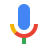
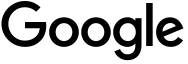
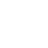

In [23]:
print soup

In [29]:
list_art = soup.find_all(class_='r')

for each in list_art:
    print each.a['href'],"\n"

http://www.ambito.com.ar/noticia.asp?id=805077 

http://www.ambito.com.ar/noticia.asp?id=805516 

http://www.ambito.com.ar/noticia.asp?id=804489 

http://www.ambito.com.ar/noticia.asp?id=804704 

http://www.ambito.com.ar/noticia.asp?id=804539 

http://www.ambito.com.ar/noticia.asp?id=804669 

http://www.ambito.com.ar/noticia.asp?id=800572 

http://www.ambito.com.ar/noticia.asp?id=803720 

http://www.ambito.com.ar/noticia.asp?id=801505 

http://www.ambito.com.ar/noticia.asp?id=805479 



In [36]:
search_next = chrome.find_element_by_id("pnnext")
search_next.click()
#send_keys(Keys.RETURN)

In [30]:
chrome.close()

In [38]:
a = range(20)
print a

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]


In [56]:
import time
import requests
import json
import random
from selenium.webdriver.support.ui import Select
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from requests.exceptions import ConnectionError
from selenium.common.exceptions import NoSuchElementException
from selenium.common.exceptions import ElementNotVisibleException
import pymongo
from pymongo import MongoClient

client = MongoClient("52.25.140.201",27017)
db = client['ProjectCorruption']
print db
collection = db['Links_to_articles']
print collection

starting_point = 0
total_added = 0
count = 0

#list_of_keywords = ['corrupcion','corrupto','corrupta','cohecho','soborno','coima','"enriquecimiento ilicito"',\
#                   '"conflicto de interes"','nepotismo','fraude','"compra de votos"','clientelismo']

list_of_keywords = ['corrupcion','corrupto','corrupta','cohecho','soborno','coima','nepotismo','fraude','clientelismo']
l_keywords = 'corrupcion corrupto corrupta cohecho soborno coima nepotismo fraude clientelismo'

#Generating the Search
chrome = webdriver.Chrome()
agent = "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/44.0.2403.130 Safari/537.36"
url = "https://www.google.com/advanced_search?hl=en&fg=1"
chrome.get(url)

search_form = chrome.find_element_by_id("_aKg")
search_form.send_keys("conflicto de interes")
search_form = chrome.find_element_by_id("_SKg")
search_form.send_keys("www.ambito.com")
search_form.send_keys(Keys.RETURN)
time.sleep(10)

first_page = True

for search_page in range(300):

    page = chrome.page_source
    soup = BeautifulSoup(page)
    list_art = soup.find_all(class_='r')

    for each in list_art:

        article_link = each.a['href']
        count += 1

        exist = collection.find_one({"link": article_link,"source":"Ambito"})
        if exist == None:
            article_source = "Ambito"
            article_object = {"link":article_link, "source":article_source, "parsed":"N"}
            article_id = collection.insert_one(article_object)
            total_added += 1
            print 'Link added:',article_link
            print 'Total added:',str(total_added)
        else:
            print 'Link passed:',article_link

    wait_time = random.uniform(1,3)
    time.sleep(wait_time)
    

    try:
        search_next = chrome.find_element_by_id("pnnext")
    except ElementNotVisibleException:
        break
    except NoSuchElementException:
        break
    else:    
        try: 
            search_next.click()
        except ElementNotVisibleException:
            break



Database(MongoClient('52.25.140.201', 27017), u'ProjectCorruption')
Collection(Database(MongoClient('52.25.140.201', 27017), u'ProjectCorruption'), u'Links_to_articles')
Link added: http://www.ambito.com/tags/?k=Conflicto%20de%20inter%E9s
Total added: 1
Link added: http://www.ambito.com/noticia.asp?id=802840&r=ml
Total added: 2
Link added: http://www.ambito.com/noticia.asp?id=802840
Total added: 3
Link added: http://www.ambito.com/noticia.asp?id=704846
Total added: 4
Link added: http://www.ambito.com/noticia.asp?id=717125
Total added: 5
Link added: http://www.ambito.com/noticia.asp?id=714973
Total added: 6
Link added: http://www.ambito.com/diario/noticia.asp?id=749247
Total added: 7
Link added: http://www.ambito.com/noticia.asp?id=438294
Total added: 8
Link added: http://www.ambito.com/noticia.asp?id=329150
Total added: 9
Link added: http://www.ambito.com/noticia.asp?id=504517
Total added: 10
Link passed: http://www.ambito.com/tags/?k=Conflicto%20de%20inter%E9s
Link passed: http://www.

In [ ]:
search_button = chrome.find_element_by_class_name('b-next')